<a href="https://colab.research.google.com/github/platypus2000jp/Colaboratory/blob/main/AI%E8%AA%8D%E8%AD%98_Teachable_Machine_%E8%A8%AD%E5%AE%9A%E5%80%A4%E4%BD%93%E9%A8%93%E7%89%88_%E3%83%91%E3%83%A9%E3%83%A1%E3%83%BC%E3%82%BF%E3%82%B5%E3%83%BC%E3%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: AI認識のTeachable MachineをPython環境で適当な例題として作成できます。エボック・バッヂサイズ・学習率の設定値をスライダーで変更し、学習の結果が変わることを可視化してインタラクティブに確認させてください。

# 必要なライブラリのインポート
import tensorflow as tf
import numpy as np
from ipywidgets import interact, FloatSlider, IntSlider
import matplotlib.pyplot as plt

# ダミーデータセットの作成 (実際の画像データに置き換える)
# 2クラス分類 (クラス0とクラス1) を想定
num_samples = 100
X_train = np.random.rand(num_samples, 2)  # 2次元の特徴量
y_train = np.random.randint(0, 2, num_samples)  # クラスラベル

# モデルの定義
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 学習関数を定義
def train_model(epochs, batch_size, learning_rate):
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

  # 学習結果の可視化
  plt.figure(figsize=(10, 4))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'])
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'])
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.show()


# スライダーによるインタラクティブな学習
interact(train_model,
         epochs=IntSlider(min=1, max=100, step=1, value=10),
         batch_size=IntSlider(min=1, max=32, step=1, value=16),
         learning_rate=FloatSlider(min=0.0001, max=0.1, step=0.0001, value=0.001));

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


interactive(children=(IntSlider(value=10, description='epochs', min=1), IntSlider(value=16, description='batch…

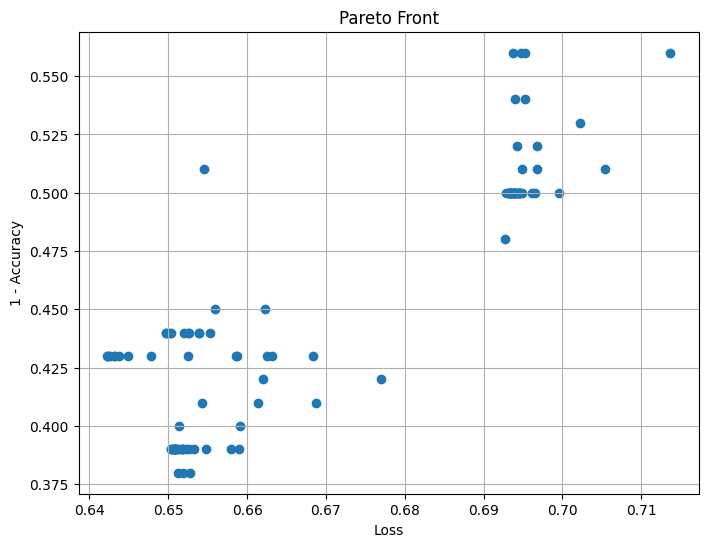

最適なパラメータ:
解 1: Epochs = 49.00092612362308, Batch Size = 6.011275409010352, Learning Rate = 0.07333503367653926, Loss = 0.6590929627418518, Accuracy = 0.6000000238418579
解 2: Epochs = 33.81659225553733, Batch Size = 2.6392520277948934, Learning Rate = 0.08172704254408211, Loss = 0.676929771900177, Accuracy = 0.5799999833106995
解 3: Epochs = 97.864075104727, Batch Size = 23.086822102094366, Learning Rate = 0.04233841696755105, Loss = 0.6518271565437317, Accuracy = 0.6200000047683716
解 4: Epochs = 71.85450084098689, Batch Size = 27.789909132150868, Learning Rate = 0.009327179682589838, Loss = 0.6505505442619324, Accuracy = 0.6100000143051147
解 5: Epochs = 11.794779125921714, Batch Size = 18.736439406299883, Learning Rate = 0.0016825737214185561, Loss = 0.6503920555114746, Accuracy = 0.6100000143051147
解 6: Epochs = 64.83239483432612, Batch Size = 29.45813554840371, Learning Rate = 0.050278574174544254, Loss = 0.6512283086776733, Accuracy = 0.6200000047683716
解 7: Epochs = 45.3263501562356

In [3]:
# prompt: エボック・バッヂサイズ・学習率の設定値が最も学習に適するようにパラメータサーチしたい。
# 多目的最適化のplatypusのライブラリを使用して設定値と作図を示してください。データは上記の続きを利用してください。

!pip install platypus-opt

import tensorflow as tf
import numpy as np
from ipywidgets import interact, FloatSlider, IntSlider
import matplotlib.pyplot as plt
from platypus import NSGAII, Problem, Real

# 必要なライブラリのインポート

# ダミーデータセットの作成 (実際の画像データに置き換える)
# 2クラス分類 (クラス0とクラス1) を想定
num_samples = 100
X_train = np.random.rand(num_samples, 2)  # 2次元の特徴量
y_train = np.random.randint(0, 2, num_samples)  # クラスラベル

# モデルの定義
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 学習関数を定義
def train_model(epochs, batch_size, learning_rate):
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
  return history.history['loss'][-1], history.history['accuracy'][-1]

# 多目的最適化問題の定義
def objective_function(variables):
  epochs, batch_size, learning_rate = variables
  loss, accuracy = train_model(int(epochs), int(batch_size), learning_rate)
  return loss, 1 - accuracy # 最小化問題として定義

problem = Problem(3, 2)
problem.types[:] = [Real(1, 100), Real(1, 32), Real(0.0001, 0.1)]
problem.function = objective_function

# アルゴリズムの実行
algorithm = NSGAII(problem)
algorithm.run(100)

# 結果の可視化
results = [(s.objectives[0], s.objectives[1], s.variables[0], s.variables[1], s.variables[2]) for s in algorithm.result]
losses, accuracies, epochs_list, batch_sizes, learning_rates = zip(*results)

plt.figure(figsize=(8, 6))
plt.scatter(losses, accuracies)
plt.xlabel('Loss')
plt.ylabel('1 - Accuracy')
plt.title('Pareto Front')
plt.grid(True)
plt.show()

# 最適なパラメータの表示
print("最適なパラメータ:")
for i in range(len(results)):
  print(f"解 {i+1}: Epochs = {epochs_list[i]}, Batch Size = {batch_sizes[i]}, Learning Rate = {learning_rates[i]}, Loss = {losses[i]}, Accuracy = {1-accuracies[i]}")